In [3]:
library(kernlab)
library(finalfit)
library(caret)
library(ggplot2)
library(dplyr)

Ładowanie wymaganego pakietu: ggplot2


Dołączanie pakietu: 'ggplot2'


Następujący obiekt został zakryty z 'package:kernlab':

    alpha


Ładowanie wymaganego pakietu: lattice


Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union




In [4]:
data(spam)

In [5]:
ff_glimpse(spam)

Warning message:
"`fct_explicit_na()` was deprecated in forcats 1.0.0.
ℹ Please use `fct_na_value_to_level()` instead.
ℹ The deprecated feature was likely used in the finalfit package.
  Please report the issue at <https://github.com/ewenharrison/finalfit/issues>."


,label,var_type,n,missing_n,missing_percent,mean,sd,min,quartile_25,median,quartile_75,max
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
make,make,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,4.5
address,address,<dbl>,4601,0,0.0,0.2,1.3,0.0,0.0,0.0,0.0,14.3
all,all,<dbl>,4601,0,0.0,0.3,0.5,0.0,0.0,0.0,0.4,5.1
num3d,num3d,<dbl>,4601,0,0.0,0.1,1.4,0.0,0.0,0.0,0.0,42.8
our,our,<dbl>,4601,0,0.0,0.3,0.7,0.0,0.0,0.0,0.4,10.0
over,over,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,5.9
remove,remove,<dbl>,4601,0,0.0,0.1,0.4,0.0,0.0,0.0,0.0,7.3
internet,internet,<dbl>,4601,0,0.0,0.1,0.4,0.0,0.0,0.0,0.0,11.1
order,order,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,5.3


In [6]:
column_names <- names(spam)
column_indices <- 1:length(column_names)
column_info <- data.frame(ColumnName = column_names, ColumnIndex = column_indices)
column_info

ColumnName,ColumnIndex
<chr>,<int>
make,1
address,2
all,3
num3d,4
our,5
over,6
remove,7
internet,8
order,9


##### Target class distribution

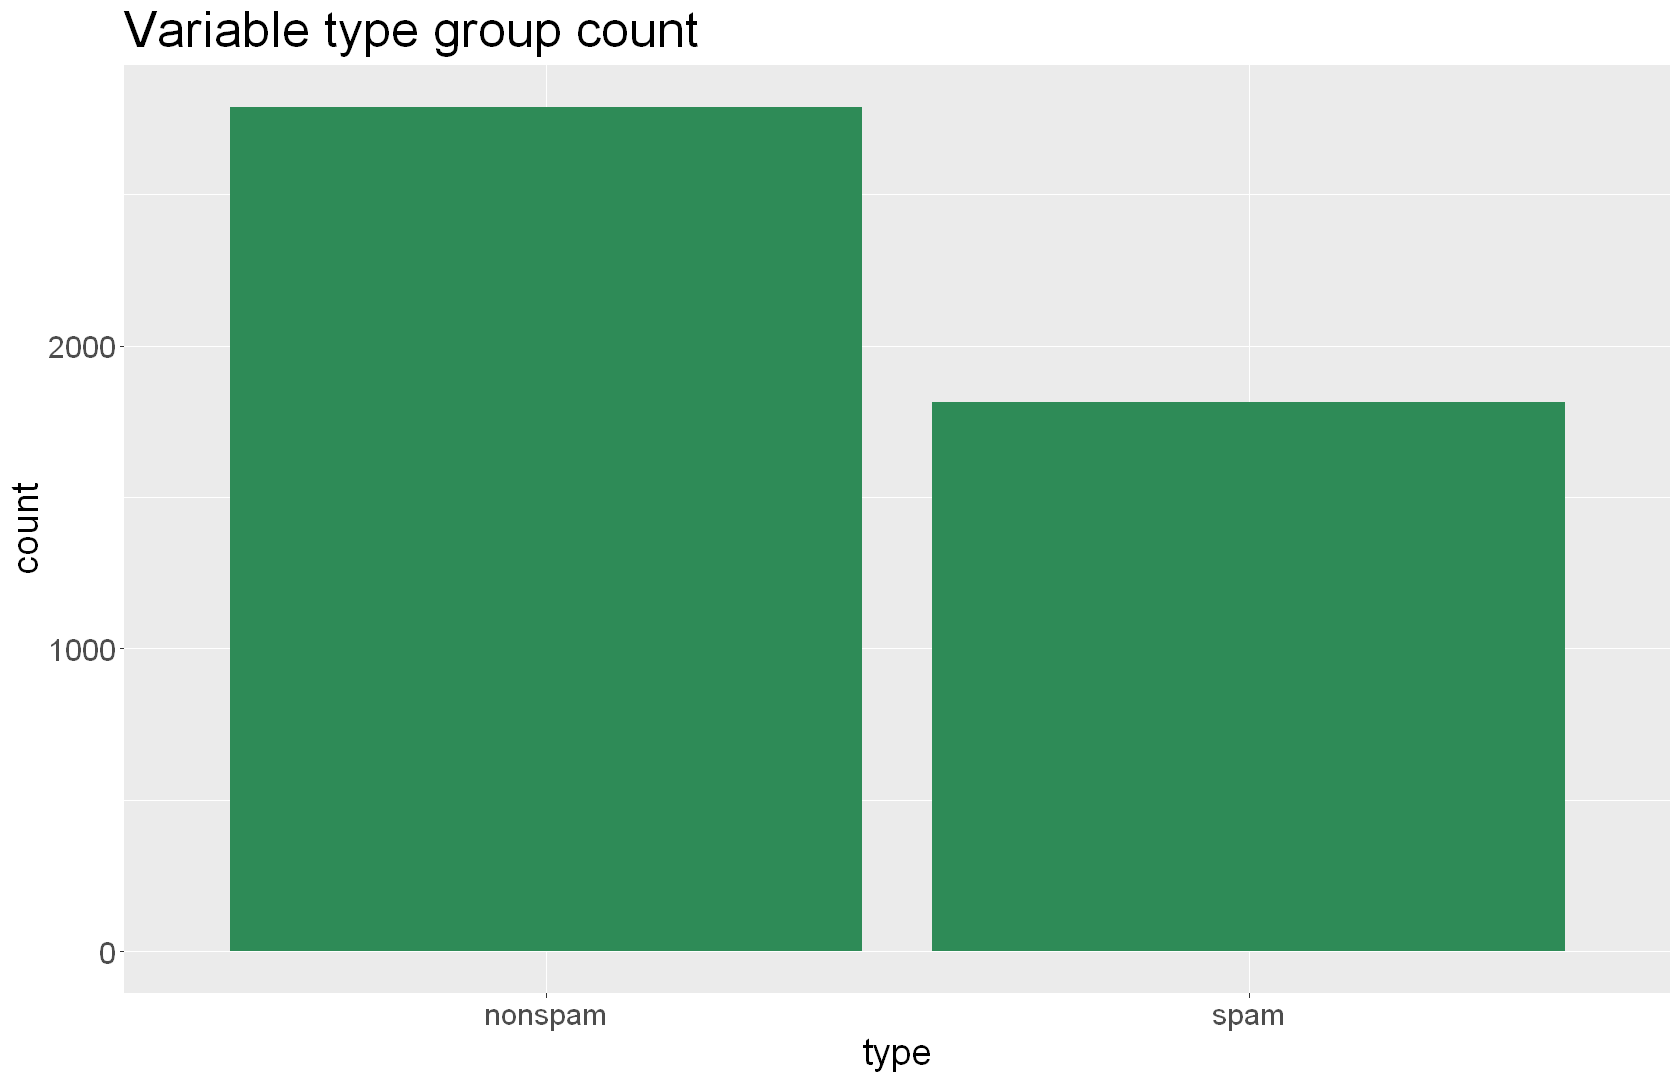

In [7]:
options(repr.plot.width = 14, repr.plot.height = 9)
ggplot(spam, aes(x=type)) +
    geom_bar(fill='seagreen4') +
    ggtitle('Variable type group count') +
    theme(
        plot.title = element_text(size = 30),
        axis.title = element_text(size = 22),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18)
        )

Not very distinct imbalance, no need for oversampling/undersampling.

## Scaling the data

In [78]:
numeric_columns <- sapply(spam, is.numeric)
spam_numeric <- spam[, numeric_columns]
scaled_data <- as.data.frame(scale(spam_numeric))
spam_scaled <- cbind(scaled_data, spam[, !numeric_columns, drop = FALSE])

In [79]:
ff_glimpse(spam_scaled)

,label,var_type,n,missing_n,missing_percent,mean,sd,min,quartile_25,median,quartile_75,max
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
make,make,<dbl>,4601,0,0.0,0.0,1.0,-0.3,-0.3,-0.3,-0.3,14.5
address,address,<dbl>,4601,0,0.0,-0.0,1.0,-0.2,-0.2,-0.2,-0.2,10.9
all,all,<dbl>,4601,0,0.0,0.0,1.0,-0.6,-0.6,-0.6,0.3,9.6
num3d,num3d,<dbl>,4601,0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,30.6
our,our,<dbl>,4601,0,0.0,-0.0,1.0,-0.5,-0.5,-0.5,0.1,14.4
over,over,<dbl>,4601,0,0.0,-0.0,1.0,-0.4,-0.4,-0.4,-0.4,21.1
remove,remove,<dbl>,4601,0,0.0,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,18.3
internet,internet,<dbl>,4601,0,0.0,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,27.4
order,order,<dbl>,4601,0,0.0,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,18.6


In [80]:
head(spam_scaled)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.3423965,0.33084894,0.7127813,-0.04689449,0.01156345,-0.3502281,-0.2917622,-0.26253302,-0.3232672,-0.37132403,⋯,-0.1584361,-0.514250655,-0.1551808,0.623938760,-0.3083214,-0.103037206,-0.045242359,0.04529300,-0.008723186,spam
2,0.3453219,0.05190355,0.4350823,-0.04689449,-0.25608946,0.6723262,0.2447167,-0.08800053,-0.3232672,1.08659319,⋯,-0.1584361,-0.026004396,-0.1551808,0.126189439,0.4237370,0.008761757,-0.002443002,0.25053560,1.228190574,spam
3,-0.1459055,-0.16505397,0.8516308,-0.04689449,1.36469761,0.3436480,0.1936234,0.03666553,1.9738023,0.01641992,⋯,-0.1173635,0.014682792,-0.1551808,0.008495019,0.4400050,-0.079745755,0.145904990,2.22086461,3.258378359,spam
4,-0.3423965,-0.16505397,-0.5567001,-0.04689449,0.47252124,-0.3502281,0.5001828,1.30825940,0.7893758,0.60579071,⋯,-0.1584361,-0.007510219,-0.1551808,-0.161916694,-0.3083214,-0.103037206,-0.052144464,-0.06245937,-0.152205182,spam
5,-0.3423965,-0.16505397,-0.5567001,-0.04689449,0.47252124,-0.3502281,0.5001828,1.30825940,0.7893758,0.60579071,⋯,-0.1584361,-0.014907890,-0.1551808,-0.164368661,-0.3083214,-0.103037206,-0.052144464,-0.06245937,-0.152205182,spam
6,-0.3423965,-0.16505397,-0.5567001,-0.04689449,2.28661319,-0.3502281,-0.2917622,4.35011140,-0.3232672,-0.37132403,⋯,-0.1584361,0.310589616,-0.1551808,-0.329876440,-0.3083214,-0.103037206,-0.069068805,-0.19073600,-0.378148095,spam


## Classification

Stratified split to train and test datasets:

In [81]:
train_indices <- createDataPartition(spam_scaled$type, p=0.75, list=FALSE)

### All features

Train-test split

In [82]:
train <- spam_scaled[train_indices,]
test  <- spam_scaled[-train_indices,]

In [83]:
knn_grid <- data.frame(k=seq(1, 10, by=1))
knn_control <- trainControl(method='cv', number=5)
knn <- caret::train(type ~ ., data=train, method='knn', trControl=knn_control, tuneGrid=knn_grid)
knn$bestTune    

,k
,<dbl>
7,7


KNN

In [84]:
knn_pred <- predict(knn, newdata=test)
knn_cm <- confusionMatrix(test$type, knn_pred)
print(knn_cm$overall[1])
print(knn_cm$table)

 Accuracy 
0.9026087 
          Reference
Prediction nonspam spam
   nonspam     659   38
   spam         74  379


Random forest

In [85]:
# the mtry parameter controls how many of the input features a decision tree has available to consider
# different sets of features will be available to different decision trees at different points
# https://crunchingthedata.com/mtry-in-random-forests/

In [86]:
rf_grid <- expand.grid(mtry=seq(1, 56, by=5))
rf_control <- trainControl(method='cv', number=5)
rf <- caret::train(type ~ ., data=train, method='rf', trControl=rf_control, tuneGrid=rf_grid)
rf$bestTune

,mtry
,<dbl>
2,6


In [87]:
rf_pred <- predict(rf, newdata=test)
rf_cm <- confusionMatrix(test$type, rf_pred)
print(rf_cm$overall[1])
print(rf_cm$table)

 Accuracy 
0.9626087 
          Reference
Prediction nonspam spam
   nonspam     685   12
   spam         31  422


### Freq only

In [88]:
spam_freq <- spam_scaled[, -seq(55, 57)]

Train-test split

In [89]:
train <- spam_freq[train_indices,]
test  <- spam_freq[-train_indices,]

KNN

In [90]:
knn_grid <- data.frame(k=seq(1, 10, by=1))
knn_control <- trainControl(method='cv', number=5)
knn <- caret::train(type ~ ., data=train, method='knn', trControl=knn_control, tuneGrid=knn_grid)
knn$bestTune

,k
,<dbl>
5,5


In [91]:
knn_pred <- predict(knn, newdata=test)
knn_cm <- confusionMatrix(test$type, knn_pred)
print(knn_cm$overall[1])
print(knn_cm$table)

 Accuracy 
0.9069565 
          Reference
Prediction nonspam spam
   nonspam     658   39
   spam         68  385


Random forest

In [92]:
rf_grid <- expand.grid(mtry=seq(1, 51, by=5))
rf_control <- trainControl(method='cv', number=5)
rf <- caret::train(type ~ ., data=train, method='rf', trControl=rf_control, tuneGrid=rf_grid)
rf$bestTune

,mtry
,<dbl>
3,11


In [93]:
rf_pred <- predict(rf, newdata=test)
rf_cm <- confusionMatrix(test$type, rf_pred)
print(rf_cm$overall[1])
print(rf_cm$table)

 Accuracy 
0.9513043 
          Reference
Prediction nonspam spam
   nonspam     675   22
   spam         34  419


### Capital only

In [94]:
spam_capital <- spam_scaled[, seq(55, 58)]

Train-test split

In [95]:
train <- spam_capital[train_indices,]
test  <- spam_capital[-train_indices,]

KNN

In [97]:
knn_grid <- data.frame(k=seq(1, 10, by=1))
knn_control <- trainControl(method='cv', number=5)
knn <- caret::train(type ~ ., data=train, method='knn', trControl=knn_control, tuneGrid=knn_grid)
knn$bestTune

,k
,<dbl>
5,5


In [98]:
knn_pred <- predict(knn, newdata=test)
knn_cm <- confusionMatrix(test$type, knn_pred)
print(knn_cm$overall[1])
print(knn_cm$table)

 Accuracy 
0.7913043 


          Reference
Prediction nonspam spam
   nonspam     581  116
   spam        124  329


Random forest

In [99]:
rf_grid <- expand.grid(mtry=seq(1, 3))
rf_control <- trainControl(method='cv', number=5)
rf <- caret::train(type ~ ., data=train, method='rf', trControl=rf_control, tuneGrid=rf_grid)
rf$bestTune

,mtry
,<int>
1,1


In [100]:
rf_pred <- predict(rf, newdata=test)
rf_cm <- confusionMatrix(test$type, rf_pred)
print(rf_cm$overall[1])
print(rf_cm$table)

 Accuracy 
0.8382609 
          Reference
Prediction nonspam spam
   nonspam     628   69
   spam        117  336


### Freq word only

In [101]:
spam_word <- spam_scaled[, -seq(49, 57)]

Train-test split

In [102]:
train <- spam_word[train_indices,]
test  <- spam_word[-train_indices,]

KNN

In [103]:
knn_grid <- data.frame(k=seq(1, 10, by=1))
knn_control <- trainControl(method='cv', number=5)
knn <- caret::train(type ~ ., data=train, method='knn', trControl=knn_control, tuneGrid=knn_grid)
knn$bestTune

,k
,<dbl>
1,1


In [104]:
knn_pred <- predict(knn, newdata=test)
knn_cm <- confusionMatrix(test$type, knn_pred)
print(knn_cm$overall[1])
print(knn_cm$table)

 Accuracy 
0.9078261 
          Reference
Prediction nonspam spam
   nonspam     646   51
   spam         55  398


Random forest

In [105]:
rf_grid <- expand.grid(mtry=seq(1, 46, by=5))
rf_control <- trainControl(method='cv', number=5)
rf <- caret::train(type ~ ., data=train, method='rf', trControl=rf_control, tuneGrid=rf_grid)
rf$bestTune

,mtry
,<dbl>
2,6


In [106]:
rf_pred <- predict(rf, newdata=test)
rf_cm <- confusionMatrix(test$type, rf_pred)
print(rf_cm$overall[1])
print(rf_cm$table)

Accuracy 
    0.94 
          Reference
Prediction nonspam spam
   nonspam     669   28
   spam         41  412


### Freq char only

In [107]:
chars <- seq(49, 54)
chars <- c(chars, 58)
spam_char <- spam_scaled[, chars]

Train-test split

In [108]:
train <- spam_char[train_indices,]
test  <- spam_char[-train_indices,]

KNN

In [109]:
knn_grid <- data.frame(k=seq(1, 10, by=1))
knn_control <- trainControl(method='cv', number=5)
knn <- caret::train(type ~ ., data=train, method='knn', trControl=knn_control, tuneGrid=knn_grid)
knn$bestTune

,k
,<dbl>
5,5


In [110]:
knn_pred <- predict(knn, newdata=test)
knn_cm <- confusionMatrix(test$type, knn_pred)
print(knn_cm$overall[1])
print(knn_cm$table)

 Accuracy 
0.8504348 
          Reference
Prediction nonspam spam
   nonspam     639   58
   spam        114  339


Random forest

In [111]:
rf_grid <- expand.grid(mtry=seq(1, 6))
rf_control <- trainControl(method='cv', number=5)
rf <- caret::train(type ~ ., data=train, method='rf', trControl=rf_control, tuneGrid=rf_grid)
rf$bestTune

,mtry
,<int>
3,3


In [112]:
rf_pred <- predict(rf, newdata=test)
rf_cm <- confusionMatrix(test$type, rf_pred)
print(rf_cm$overall[1])
print(rf_cm$table)

Accuracy 
0.866087 
          Reference
Prediction nonspam spam
   nonspam     648   49
   spam        105  348
